In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [31]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [6]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)

Requirement already satisfied: tqdm in ./anaconda3/lib/python3.12/site-packages (from opendatasets) (4.66.4)

Collecting kaggle (from opendatasets)

Downloading kaggle-1.6.17.tar.gz (82 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: click in ./anaconda3/lib/python3.12/site-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (2024.7.4)

Requirement already satisfied: python-dateutil in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (2.9.0.post0)

Requirement already satisfied: requests in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (2.32.2)

Requirement already satisfied: python-slugify in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (5.0.2)

Requirement already satisfied: urllib3 in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (2.2.2)

Requirement already satisfied: bleach in ./anaconda3/lib/python3.12/site-packages (from kaggle->opendatasets) (4.1.0)

Requirement already satisfied: packaging in ./anaconda3/lib/python3.12/site-packages (from bleach->kaggle->opendatasets) (23.2)

Requirement already satisfied: webencodings in ./anaconda3/lib/python3.12/site-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in ./anaconda3/lib/python3.12/site-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in ./anaconda3/lib/python3.12/site-packages (from requests->kaggle->opendatasets) (2.0.4)

Requirement already satisfied: idna<4,>=2.5 in ./anaconda3/lib/python3.12/site-packages (from requests->kaggle->opendatasets) (3.7)

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Building wheels for collected packages: kaggle

Building wheel for kaggle (setup.py): started

Building wheel for kaggle (setup.py): finished with status 'done'

Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=5184616695ae9c6dde17846ce2d76834bf4e64352eea92796fbaaafe782be79b

Stored in directory: /home/gaurav/.cache/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983

Successfully built kaggle

Installing collected packages: kaggle, opendatasets

Successfully installed kaggle-1.6.17 opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  Gaurav Roy


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:48<00:00, 2.36MB/s] 


In [33]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [37]:
df.shape

(7824482, 4)

In [39]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [41]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [43]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [45]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A2UF9ZT5A8JPXN,B00008VIX2,4.0,1161129600
1,A3DN8G9LK0OGEM,B0013CDZDI,2.0,1404518400
2,A3O6UQXC4ZL5DI,B000EEZ2R8,2.0,1167436800
3,A132N3ZRQOXS4A,B002S53LJ2,5.0,1314921600
4,AP59Q9BCYDP8R,B0041RFWZ6,5.0,1402704000


In [47]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [49]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [51]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012670e+00
std,1.380345e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [53]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [55]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [57]:
electronics_data.head()

,userId,productId,rating
0,A2UF9ZT5A8JPXN,B00008VIX2,4.0
1,A3DN8G9LK0OGEM,B0013CDZDI,2.0
2,A3O6UQXC4ZL5DI,B000EEZ2R8,2.0
3,A132N3ZRQOXS4A,B002S53LJ2,5.0
4,AP59Q9BCYDP8R,B0041RFWZ6,5.0


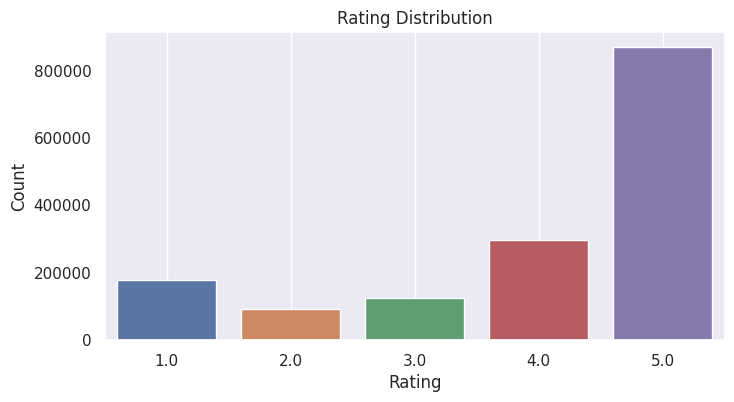

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [59]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225784
Total unique products :  237885


In [62]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     124
ADLVFFE4VBT8       97
A3OXHLG6DIBRW8     92
A680RUE1FDO8B      88
A6FIAB28IS79       79
Name: rating, dtype: int64

In [63]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 25 


In [69]:
#Popularity Based Recommendation
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [70]:
data.head()

,userId,productId,rating
3,A132N3ZRQOXS4A,B002S53LJ2,5.0
6,ACA8CVTJGL10M,B006JG2IPY,5.0
8,ABRG9G6XRLNEE,B001HSOFI2,5.0
12,A7ERY8BQH1SOB,B002LITI70,5.0
15,A2Z6G8L3UBG9SP,B00F9VROO0,5.0


In [71]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [72]:
no_of_rating_per_product.head()

productId
B0074BW614    3635
B00DR0PDNE    3319
B007WTAJTO    2843
B006GWO5WK    2465
B0019EHU8G    2411
Name: rating, dtype: int64

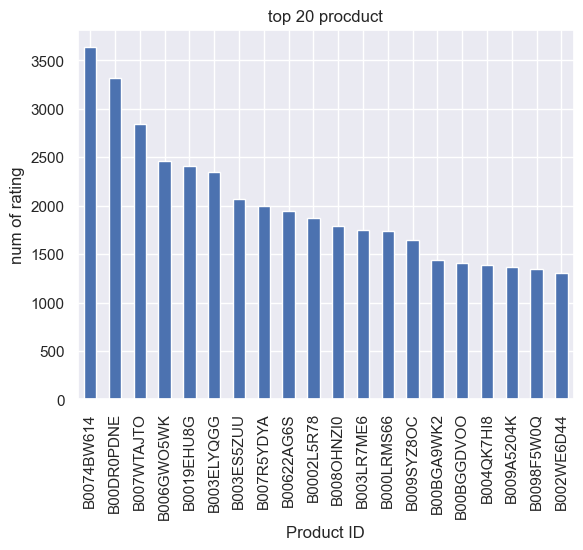

In [74]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [80]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [84]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.407407
1400501466,3.460000
1400532655,4.000000
140053271X,3.956989
B00000DM9W,4.630769


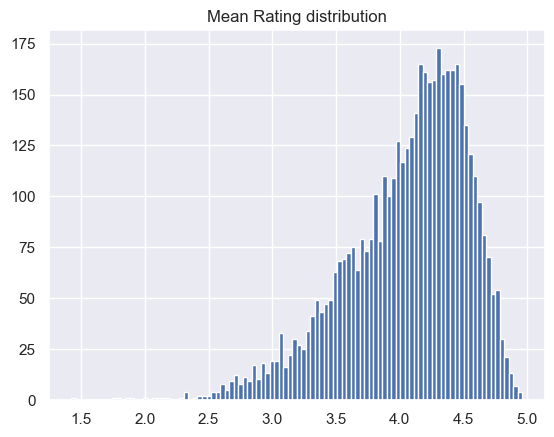

In [86]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9238970240752548

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.402985,201
1400532655,3.812500,96
140053271X,3.732558,86
B00000DM9W,4.613333,75
B00000J1V5,4.540984,61


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.49879,3719


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  106


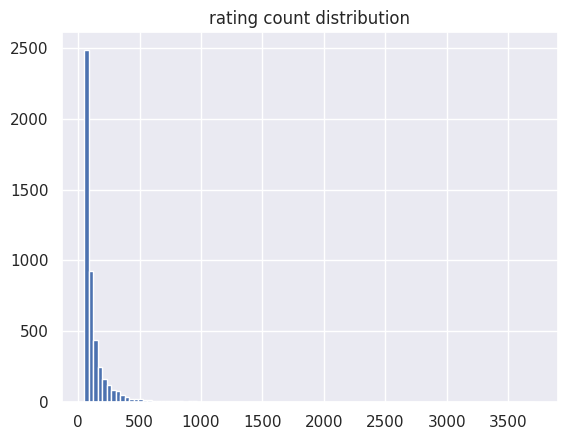

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

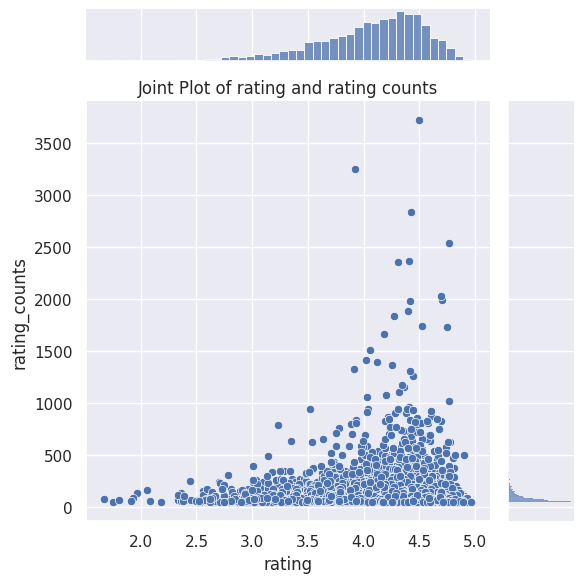

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

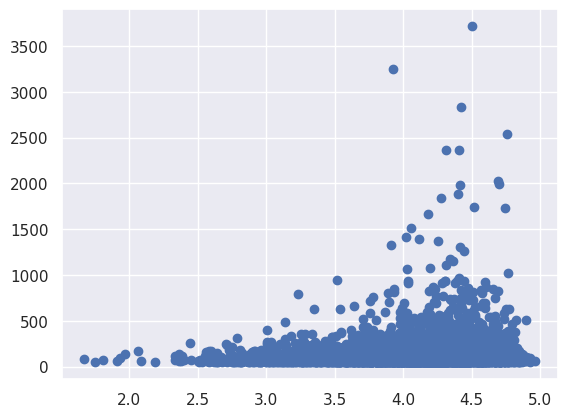

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11020270057263495 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [88]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)

Collecting scikit-surprise (from surprise)

Downloading scikit_surprise-1.1.4.tar.gz (154 kB)

Output()

Installing build dependencies: started

Installing build dependencies: finished with status 'done'

Getting requirements to build wheel: started

Getting requirements to build wheel: finished with status 'done'

Preparing metadata (pyproject.toml): started

Preparing metadata (pyproject.toml): finished with status 'done'

Requirement already satisfied: joblib>=1.2.0 in ./anaconda3/lib/python3.12/site-packages (from scikit-surprise->surprise) (1.4.2)

Requirement already satisfied: numpy>=1.19.5 in ./anaconda3/lib/python3.12/site-packages (from scikit-surprise->surprise) (1.26.4)

Requirement already satisfied: scipy>=1.6.0 in ./anaconda3/lib/python3.12/site-packages (from scikit-surprise->surprise) (1.13.1)

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (pyproject.toml): started

Building wheel for scikit-surprise (pyproject.toml): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=600328 sha256=c1998ca033e9e0de64ab45d95ea547b6311a784658db0ff51b2251feb4675fc5

Stored in directory: /home/gaurav/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.4 surprise-0.1

In [89]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [90]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [91]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [92]:
#make prediction using testset
test_pred=algo.test(testset)

In [95]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3118


1.3117933353066396

In [100]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000JDF5,B00000JI4F,B00000K135,B00000K2YR,B00001P4XA,...,B00I2ZBD1U,B00I94IPTW,B00I9K3ZQ4,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IT1WJZQ,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A01686043F81O7JWV2V82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A022899328A0QROR32DCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02424652HU377L89NHUJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03341452E9BWOB6KLA5Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A05270967G3DU4T806HA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19898, 4370)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00177463W0XWB16A9O05,A01226232SWR9CRXVU4MY,A0243085HOOFEHX1ABJF,A02453511MLO2A636SEU9,A02706522XN7C2M9GMHPY,A029890629O30UETJ6W91,A03301153EBVJDKSCH85G,A03605631ICATFHK20PJ1,A03670271E4DKHD4RU1OY,A03970901SJICBXATTVT7,...,AZX0W2PEZ2Y9A,AZXD1K34BB4N,AZXJJM4F1SY3,AZXOVQHU9901G,AZY4E1MC6QPSM,AZYBCXJ2MVWL1,AZYBZEVISD0YX,AZZ8COE8COY71,AZZIFAMCVA0YJ,AZZPA8G4TZBJB
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J1V5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(4370, 19898)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4370, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4370, 4370)

In [ ]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4370,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(282, 4370)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B00001P4ZR',
 'B00004Z5M1',
 'B000051ZOA',
 'B00005N6KG',
 'B00005T380',
 'B00005T3C8',
 'B000067O5G',
 'B00006I5SQ',
 'B00006JQ06',
 'B000093UDQ',
 'B0000BZOGJ',
 'B0001H27PS',
 'B0002D03ZW',
 'B0002J28NQ',
 'B0002RBQO0',
 'B0002U1TJY',
 'B0002WTK48',
 'B0002ZW5W4',
 'B00030097G']